## Supplementary Figure 9 - Plate position diffusion

Inspect position effects by observing how non-replicates correlate across a diffuse area per plate.

Related to Figure 1

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

source("viz_themes.R")
source("plotting_functions.R")
source("data_functions.R")

In [2]:
output_figure_base <- file.path("figures", "supplementary", "figureS9_platepositiondiffusion")
extensions <- c(".png", ".pdf")

In [3]:
# Setup directories and options
base_dir <- file.path("..", "1.Data-exploration", "Profiles_level4")
data_dir <- file.path(base_dir, "plate_position_effects", "results", "diffusion")
platemap_dir <- file.path(base_dir, "plate_position_effects", "data")

input_data_types <- list(
    "CellPainting" = c("", "nonspherized", "subsample"),
    "L1000" = c("", "W")
)

In [4]:
# Load diffusion files
diffusion_results <- list()
for (assay in c("CellPainting", "L1000")) {
    for (diffusion in c(0, 1, 2, 3, 4)) {
        for (input_data_type in input_data_types[[assay]]) {
            list_id <- paste0(assay, diffusion, input_data_type)
            
            diffusion_results[[list_id]] <- load_plate_diffusion_results(
                assay,
                data_dir,
                platemap_metadata_dir=platemap_dir,
                diffusion=diffusion,
                input_data_type=input_data_type
            )
        }
    }
}

# Merge files together
diffusion_results <- dplyr::bind_rows(diffusion_results) %>%
    dplyr::mutate(dataset = paste(assay, input_data_type))

print(dim(diffusion_results))
head(diffusion_results)

[1] 2054510      19


num_observations,min_max,mean,variance,skewness,kurtosis,median,cor_category,well,plate_map,assay,compound_type,pert_iname,moa,dose,replicate_id,input_data_type,diffusion,dataset
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1310,"(-0.15332436535811678, 0.15267426053330072)",-0.0009565087,0.001293676,-0.03609782,1.257935,-0.001436458,nonreplicate,A01,C-7161-01-LM6-027,CellPainting,dmso,dmso,control vehicle,0,replicate_0,full_standard,0,CellPainting full_standard
1310,"(-0.15332436535811678, 0.15267426053330072)",-0.0009565087,0.001293676,-0.03609782,1.257935,-0.001436458,nonreplicate,A01,C-7161-01-LM6-027,CellPainting,dmso,dmso,control vehicle,0,replicate_1392,full_standard,0,CellPainting full_standard
1310,"(-0.15332436535811678, 0.15267426053330072)",-0.0009565087,0.001293676,-0.03609782,1.257935,-0.001436458,nonreplicate,A01,C-7161-01-LM6-027,CellPainting,dmso,dmso,control vehicle,0,replicate_1440,full_standard,0,CellPainting full_standard
1310,"(-0.15332436535811678, 0.15267426053330072)",-0.0009565087,0.001293676,-0.03609782,1.257935,-0.001436458,nonreplicate,A01,C-7161-01-LM6-027,CellPainting,dmso,dmso,control vehicle,0,replicate_1536,full_standard,0,CellPainting full_standard
1310,"(-0.15332436535811678, 0.15267426053330072)",-0.0009565087,0.001293676,-0.03609782,1.257935,-0.001436458,nonreplicate,A01,C-7161-01-LM6-027,CellPainting,dmso,dmso,control vehicle,0,replicate_1560,full_standard,0,CellPainting full_standard
10,"(-0.02320448129682337, 0.14112631085991817)",0.0252172855,0.002394537,1.48840300,1.206030,0.009530794,replicate,A01,C-7161-01-LM6-027,CellPainting,dmso,dmso,control vehicle,0,replicate_0,full_standard,0,CellPainting full_standard


In [5]:
# Summarize diffusion results
diffuse_summary_df <- diffusion_results %>%
    dplyr::mutate(med_cor_weight = num_observations * median) %>%
    dplyr::group_by(assay, input_data_type, well, cor_category, diffusion) %>%
    dplyr::mutate(
        total_well_observations = sum(num_observations),
        median_cor = sum(med_cor_weight / total_well_observations),
        med_count = median(`num_observations`),
        col = substring(well, 1, 1),
        row = substring(well, 2),
        per_well_median_var = median(variance),
        per_well_median_skew = median(skewness),
        per_well_median_mean = median(mean)
    ) %>%
    dplyr::select(
        median_cor,
        per_well_median_var,
        per_well_median_skew,
        per_well_median_mean,
        assay,
        input_data_type,
        well,
        col,
        row,
        compound_type,
        cor_category,
        dose,
        diffusion,
        dataset
    ) %>%
    dplyr::distinct() %>%
    dplyr::rename(Metadata_Well = well) %>%
    dplyr::ungroup()

# Recode data for downstream figures
diffuse_summary_df$col <- factor(diffuse_summary_df$col, levels = rev(LETTERS[0:16]))

recode_dataset_name <- c(
    "CellPainting full_standard" = "Cell Painting spherized",
    "CellPainting subsample" = "Cell Painting subsampled",
    "CellPainting nonspherized" = "Cell Painting nonspherized",
    "L1000 W" = "L1000 spherized",
    "L1000 full_standard" = "L1000 nonspherized"
)

diffuse_summary_df$dataset <- dplyr::recode(diffuse_summary_df$dataset, !!!recode_dataset_name)
diffuse_summary_df$dataset <- factor(diffuse_summary_df$dataset, levels = paste(recode_dataset_name))

print(dim(diffuse_summary_df))
head(diffuse_summary_df, 3)

[1] 22040    14


median_cor,per_well_median_var,per_well_median_skew,per_well_median_mean,assay,input_data_type,Metadata_Well,col,row,compound_type,cor_category,dose,diffusion,dataset
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<dbl>,<chr>,<fct>
2.620250e-03,0.0010346809,0.1599101,2.942669e-03,CellPainting,full_standard,A01,A,01,dmso,nonreplicate,0,0,Cell Painting spherized
2.642168e-02,NA,0.5080818,2.902909e-02,CellPainting,full_standard,A01,A,01,dmso,replicate,0,0,Cell Painting spherized
7.468465e-05,0.0009132788,0.1337211,2.803247e-05,CellPainting,full_standard,A02,A,02,dmso,nonreplicate,0,0,Cell Painting spherized


## First visualization - Platemap effects by dataset and diffusion

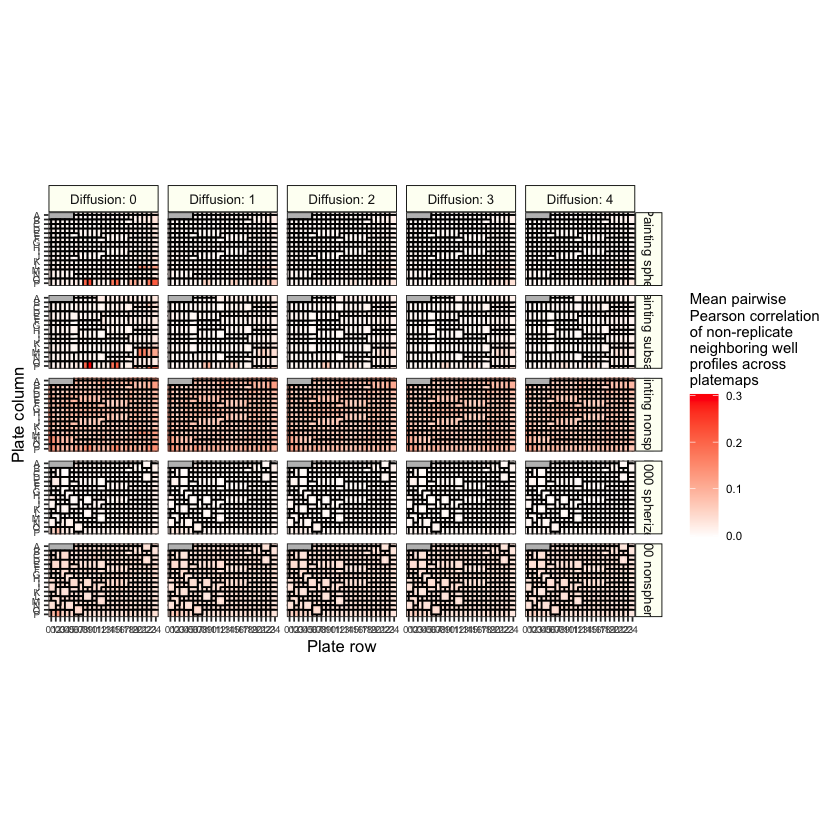

In [6]:
append_diffusion <- function(string) paste("Diffusion:", string)

platemap_diffusion_gg <- (
    ggplot(diffuse_summary_df %>%
        dplyr::filter(cor_category == 'nonreplicate', compound_type == "compound"), aes(x = row, y = col))
    + geom_point(aes(fill = per_well_median_mean), size = 2.35, pch = 22, stroke = 0.8)
    + figure_theme
    + coord_fixed()
    + facet_grid(
        "dataset~diffusion",
        labeller = labeller(diffusion = as_labeller(append_diffusion))
        )
    + xlab("Plate row")
    + ylab("Plate column")
    + scale_fill_gradient(
        name = "Mean pairwise\nPearson correlation\nof non-replicate\nneighboring well\nprofiles across\nplatemaps",
        low = "white",
        high = "red",
        na.value = "grey"
    )
    + theme(
        plot.margin = unit(c(t = -2.75, r = 0.25, b = -2.75, l = 0.25), "cm"),
        axis.text = element_text(size = 6),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_rect(fill = "grey")
    )
)

platemap_diffusion_gg

## Second visualization - Distributions of non-replicate correlations

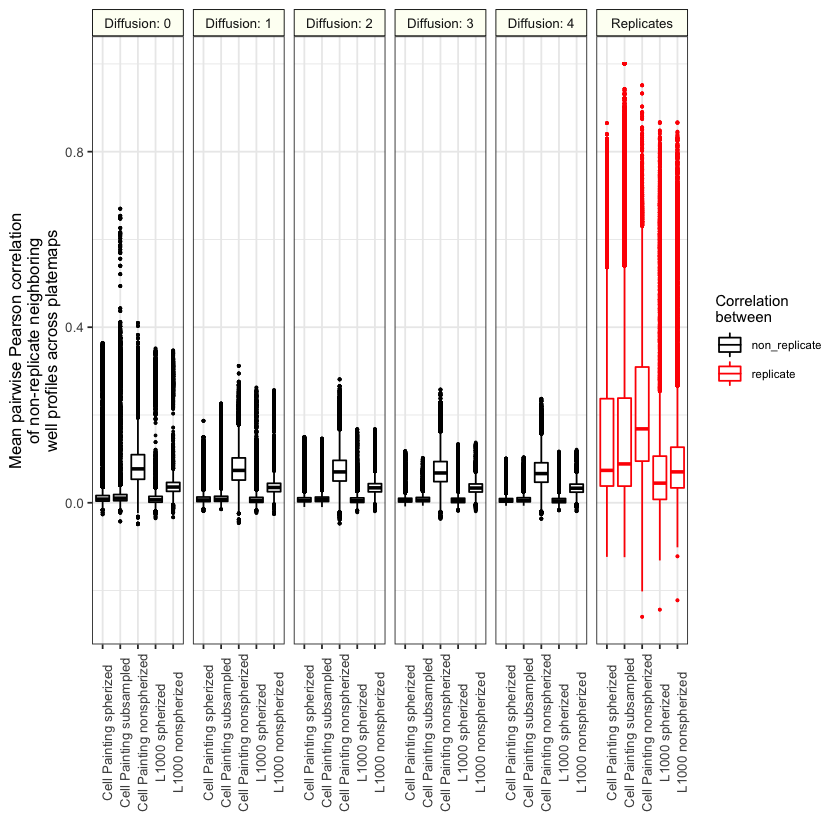

In [7]:
diffusion_results_viz <- diffusion_results %>%
    dplyr::filter((diffusion == 1  & cor_category == 'replicate') | cor_category == 'nonreplicate')

diffusion_results_viz$diffusion[(diffusion_results_viz$diffusion == 1  & diffusion_results_viz$cor_category == 'replicate')] <- "All"

diffusion_results_viz$dataset <- dplyr::recode(diffusion_results_viz$dataset, !!!recode_dataset_name)
diffusion_results_viz$dataset <- factor(diffusion_results_viz$dataset, levels = paste(recode_dataset_name))

diffusion_results_viz$cor_category[diffusion_results_viz$cor_category == 'nonreplicate'] <- "non_replicate"

diffusion_results_viz <- diffusion_results_viz %>%
    dplyr::mutate(diffusion_facet = paste("Diffusion:", diffusion))

diffusion_results_viz$diffusion_facet <- dplyr::recode_factor(diffusion_results_viz$diffusion_facet, "Diffusion: All" = "Replicates")

diffusion_results_viz$diffusion_facet <- factor(
    diffusion_results_viz$diffusion_facet,
    levels = c("Diffusion: 0", "Diffusion: 1", "Diffusion: 2", "Diffusion: 3", "Diffusion: 4", "Replicates")
    )

boxplot_diffusion_gg = (
    ggplot(diffusion_results_viz, aes(x = dataset, y = mean, color = cor_category))
    + geom_boxplot(outlier.size = 0.4, lwd = 0.5)
    + facet_grid(
        "~diffusion_facet",
        scales = "free_x"
    )
    + figure_theme
    + theme(axis.text.x = element_text(angle = 90))
    + scale_color_manual(name = "Correlation\nbetween", values = replicate_colors)
    + xlab("")
    + ylab("Mean pairwise Pearson correlation\nof non-replicate neighboring\nwell profiles across platemaps")
)

boxplot_diffusion_gg

In [8]:
diffusion_gg <- cowplot::plot_grid(
    platemap_diffusion_gg,
    boxplot_diffusion_gg,
    rel_heights = c(1, 0.5),
    labels = c("a", "b"),
    nrow = 2
)

for (extension in extensions) {
    output_file <- paste0(output_figure_base, extension)
    cowplot::save_plot(output_file, diffusion_gg, base_width = 13, base_height = 13, dpi = 500)
}